# **Stock Price Prediction using LSTM**

### **Overview**:

In this notebook, we use stock data from Yahoo Finance, containing 1,258 instances and 7 features. The objective is to build a model that predicts future stock prices based on historical trends. To achieve this, we utilize the Long Short-Term Memory (LSTM) model from the Keras library, which is well-suited for making time-based predictions. The workflow of this notebook is divided into the following key sections:



1. **Data Preprocessing**:



Preparing and scaling the data to make it suitable for input into the model.
2. **Model Building**:

Constructing and training the LSTM model to learn from historical data.

3. **Future Predictions**:

Using the trained model to predict future stock prices based on previous trends.

In [1]:
# import Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


### Load Dataset

In [2]:

# Load the dataset
yahoo_data = pd.read_excel('//content/yahoo_data.xlsx')
yahoo_data.head()


,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [3]:
yahoo_data.shape


(1258, 7)

### Data Preprocessing

In [ ]:

# Converting 'Date' column to datetime and setting it as index
yahoo_data['Date'] = pd.to_datetime(yahoo_data['Date'])
yahoo_data.set_index('Date', inplace=True)

# Sorting by date for consistency
yahoo_data.sort_index(inplace=True)

# Select 'Open' and 'Close*' columns for the analysis
df = yahoo_data[['Open', 'Close*']]
df.head()


,Open,Close*
Date,,
2018-05-01,24117.29,24099.05
2018-05-02,24097.63,23924.98
2018-05-03,23836.23,23930.15
2018-05-04,23865.22,24262.51
2018-05-07,24317.66,24357.32


### Data Visualization

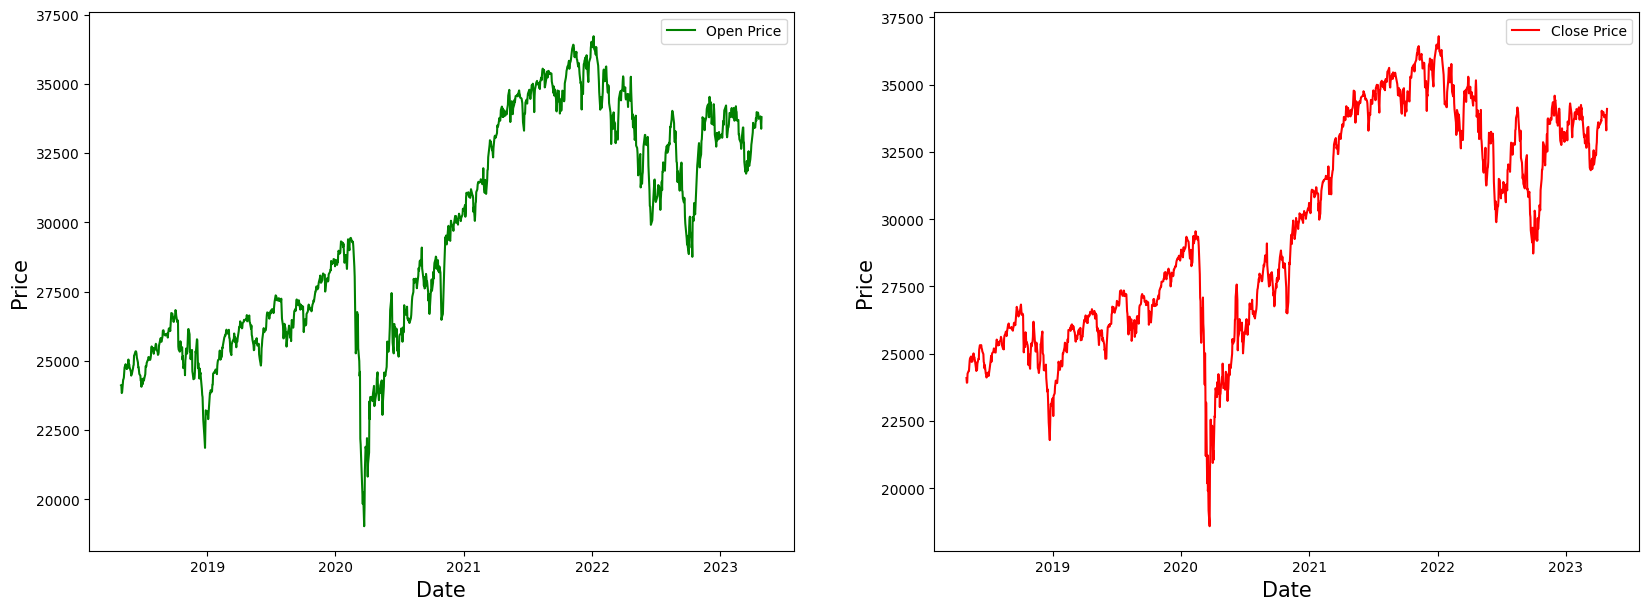

In [ ]:

# Visualize the Open and Close prices
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
ax[0].plot(df['Open'], label='Open Price', color='green')
ax[0].set_xlabel('Date', size=15)
ax[0].set_ylabel('Price', size=15)
ax[0].legend()

ax[1].plot(df['Close*'], label='Close Price', color='red')
ax[1].set_xlabel('Date', size=15)
ax[1].set_ylabel('Price', size=15)
ax[1].legend()

plt.show()


### Scaling the Data

In [ ]:

# Scaling the data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Convert back to DataFrame for easier manipulation
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)
df_scaled.head()


,Open,Close*
Date,,
2018-05-01,0.287604,0.302461
2018-05-02,0.286493,0.292900
2018-05-03,0.271719,0.293184
2018-05-04,0.273358,0.311438
2018-05-07,0.298928,0.316645


### Splitting Data into Training and Testing

In [ ]:

# Splitting the data into training and testing sets
training_size = int(len(df_scaled) * 0.8)
train_data, test_data = df_scaled[:training_size], df_scaled[training_size:]


### Creating Sequences for LSTM

In [ ]:

def create_sequences(data, time_steps=50):
    sequences = []
    labels = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:i+time_steps])
        labels.append(data[i+time_steps, 1])  # Use the 'Close*' column as the label
    return np.array(sequences), np.array(labels)

# Create sequences for training and testing
train_seq, train_label = create_sequences(train_data.values)
test_seq, test_label = create_sequences(test_data.values)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape


((956, 50, 2), (956,), (202, 50, 2), (202,))

In [ ]:
print(train_seq[:1,:,:])
print(train_label[1])


[[[0.28760376 0.30246071]
  [0.28649267 0.29290048]
  [0.2717195  0.29318443]
  [0.27335788 0.31143823]
  [0.29892779 0.31664536]
  [0.30026664 0.31680408]
  [0.30353494 0.32681797]
  [0.31441305 0.337637  ]
  [0.32385002 0.34267003]
  [0.33067315 0.34641789]
  [0.32672723 0.33581799]
  [0.32179738 0.3392517 ]
  [0.32349736 0.33623375]
  [0.32097225 0.33629471]
  [0.33088169 0.35267238]
  [0.34017793 0.34284798]
  [0.32379746 0.34572588]
  [0.33055955 0.341604  ]
  [0.3251301  0.33838174]
  [0.31525683 0.31687218]
  [0.30741473 0.33369637]
  [0.31605935 0.31985938]
  [0.31161158 0.33190756]
  [0.32209295 0.34171   ]
  [0.3273246  0.34095702]
  [0.32924726 0.35998247]
  [0.34834952 0.36520113]
  [0.34931876 0.36932686]
  [0.35651771 0.3696443 ]
  [0.35709135 0.36955753]
  [0.35606446 0.36299273]
  [0.35188231 0.36157081]
  [0.34408655 0.35691179]
  [0.33434157 0.3512543 ]
  [0.32412977 0.33547748]
  [0.32455816 0.33314825]
  [0.31710037 0.32237809]
  [0.31075706 0.32892421]
  [0.3071830

In [ ]:
print(test_seq[:1,:,:])

[[[0.81368852 0.84164629]
  [0.83409347 0.79006487]
  [0.7883995  0.79469423]
  [0.79448058 0.79838991]
  [0.79932453 0.84959182]
  [0.83788905 0.79120505]
  [0.77683585 0.78578976]
  [0.77182236 0.74988906]
  [0.76158852 0.74522291]
  [0.74006456 0.72728381]
  [0.71609066 0.72158238]
  [0.73105711 0.7471957 ]
  [0.74169843 0.7486654 ]
  [0.75723173 0.77234602]
  [0.75958674 0.70838853]
  [0.69142614 0.69537537]
  [0.70071277 0.69585703]
  [0.69895797 0.72981735]
  [0.71714015 0.73247447]
  [0.72271824 0.74300077]
  [0.74712505 0.77139038]
  [0.77464361 0.80301268]
  [0.79869099 0.79077391]
  [0.7984491  0.7810588 ]
  [0.77882124 0.80495251]
  [0.78884202 0.78580789]
  [0.79142591 0.78669103]
  [0.77735297 0.80121015]
  [0.79453596 0.78642301]
  [0.77992951 0.75137689]
  [0.7361243  0.70304574]
  [0.68477369 0.65493153]
  [0.65354488 0.64658837]
  [0.65231058 0.66326811]
  [0.63734752 0.62254582]
  [0.61513464 0.62044287]
  [0.6242896  0.65567353]
  [0.63999414 0.65308561]
  [0.6523009

### **Building the LSTM Model**

In [ ]:

# Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add Dense layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)

# **Training the Model**

In [ ]:

# Train the model
model.fit(train_seq, train_label, epochs=80, validation_data=(test_seq, test_label), verbose=1)


Epoch 1/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - loss: 0.2571 - val_loss: 0.0122
Epoch 2/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0084 - val_loss: 0.0021
Epoch 3/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0072 - val_loss: 0.0025
Epoch 4/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0058 - val_loss: 0.0021
Epoch 5/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0051 - val_loss: 0.0022
Epoch 6/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0048 - val_loss: 0.0021
Epoch 7/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0060 - val_loss: 0.0020
Epoch 8/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 9/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0049 - val_loss: 0.0019
Epoch 10/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0043 - val_loss: 0.0018
Epoch 11/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0051 - val_loss: 0.0021
Epoch 12/80
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0

# **Prediction Phase**




In [ ]:
y_pred = model.predict(test_seq)
y_pred.shape

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


(202, 1)

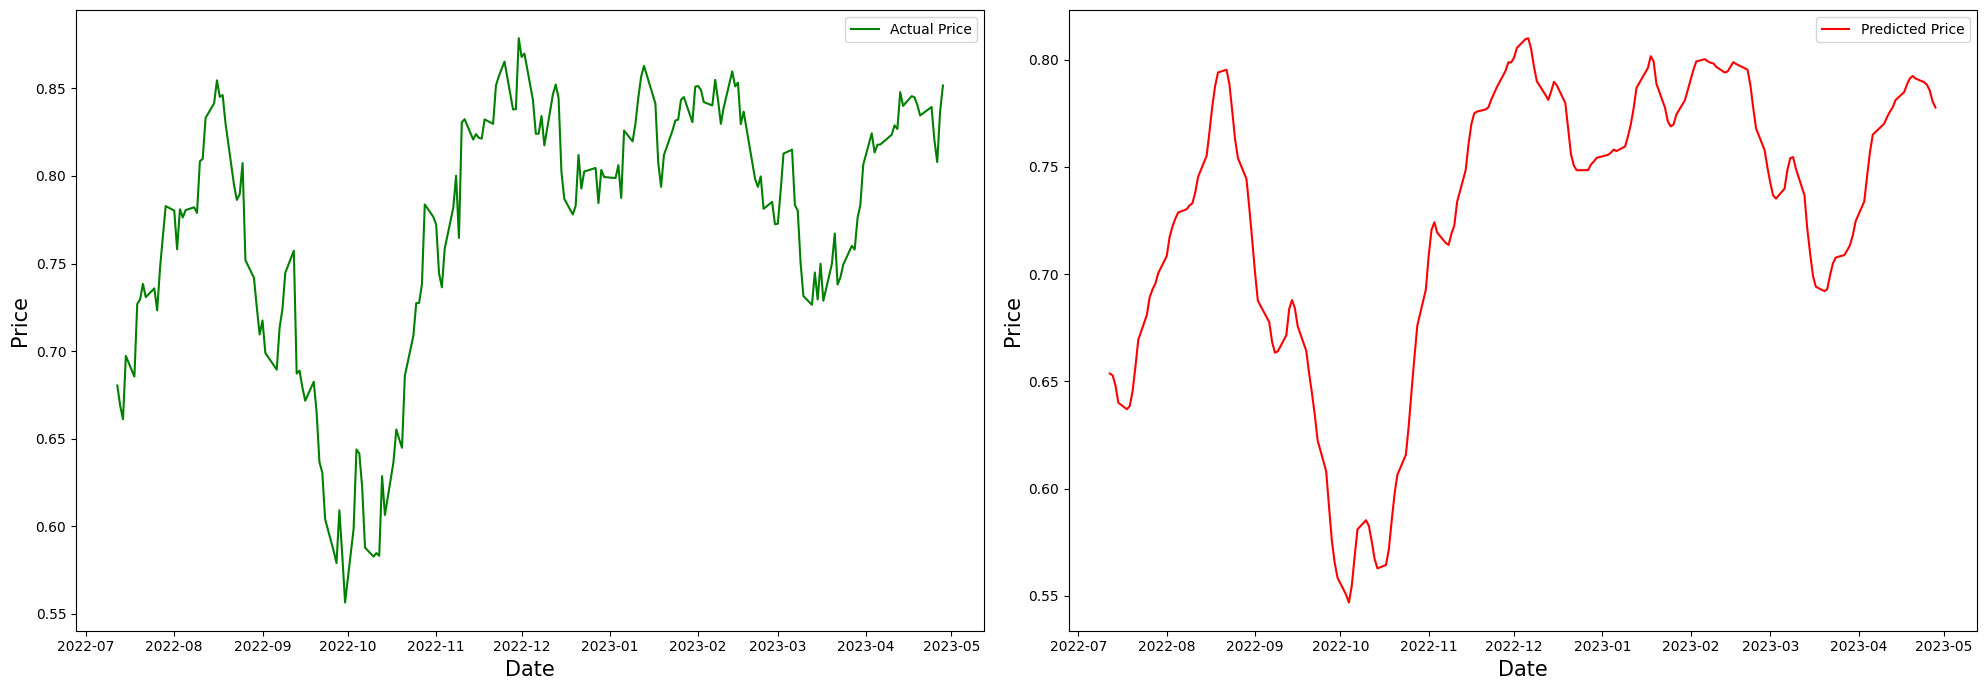

In [ ]:
# Plotting graph for visualize the trend of Actual and Prediction Stock
fig ,ax  = plt.subplots(1,2,figsize=(20,7))

ax[0].plot(yahoo_data[-(test_seq.shape[0]):].index,test_label, label='Actual Price', color='green')
ax[0].set_xlabel('Date', size=15)
ax[0].set_ylabel('Price', size=15)
ax[0].legend()

ax[1].plot(yahoo_data[-(test_seq.shape[0]):].index,y_pred, label='Predicted Price', color='red')
ax[1].set_xlabel('Date', size=15)
ax[1].set_ylabel('Price', size=15)
ax[1].legend()
plt.tight_layout()
plt.show()

### Forecasting future stock prices is essential for investors seeking to make informed decisions and maximize their returns.

In [ ]:
def predict_next_days(model, data, scaler,n_days, time_steps=50):
    last_60_days = np.array(data[-time_steps:])  # Use the last time_steps as input
    last_60_days = last_60_days.reshape(1, time_steps, 2)  # Ensure the input shape is correct
    future_prices = []

    for day in range(n_days):
        predicted_price = model.predict(last_60_days)  # Predict the next value
        predicted_price = predicted_price.reshape(1, 1)  # Reshape predicted price to (1, 1)

        # Expanding predicted data to have two features (duplicate or use a placeholder for the second feature)
        predicted_price_expanded = np.repeat(predicted_price, 2, axis=-1)  # Duplicate the predicted price to match shape (1, 1, 2)

        future_prices.append(predicted_price[0, 0])  # Store the prediction

        # Update last_60_days to include the new prediction
        last_60_days = np.append(last_60_days[:, 1:, :], [predicted_price_expanded], axis=1)

    # Convert future_prices to the required shape (10, 1)
    future_prices = np.array(future_prices).reshape(-1, 1)

    # Append a dummy second column (e.g., zeros) to match the shape required by the scaler
    future_prices_with_dummy = np.concatenate([future_prices, np.zeros((n_days, 1))], axis=1)

    # Inverse transform the predictions
    future_prices_original_scale = scaler.inverse_transform(future_prices_with_dummy)[:, 0]

    return future_prices_original_scale



In [ ]:
# Call the function to predict the next 50 days Stock

next_data = predict_next_days(model,df_scaled,scaler,50)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

In [ ]:
# Convert Scaled data of actual and predicted to its original scale
test_ = scaler.inverse_transform(test_label.reshape(-1,2))
y_pred_ = scaler.inverse_transform(y_pred.reshape(-1,2))

# Reshape data into 1d array
test_=test_.reshape(-1)
y_pred_ = y_pred_.reshape(-1)

In [ ]:
import pandas as pd

# Given list of dates
date_list = ['2023-04-24', '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28']

# Convert the list to a Pandas DateTime index
dates = pd.to_datetime(date_list)

# Get the last date from the original list
last_date = dates[-1]

# Generate the next 10 days after the last date
future_datesTime = [last_date + pd.DateOffset(days=i) for i in range(1, 51)]

# Convert to string format (optional)
future_dates_str = [date.strftime('%Y-%m-%d') for date in future_datesTime]

# Convert data type of future dates into Date time
future_dates =pd.to_datetime(future_dates_str)


['2023-04-29', '2023-04-30', '2023-05-01', '2023-05-02', '2023-05-03', '2023-05-04', '2023-05-05', '2023-05-06', '2023-05-07', '2023-05-08', '2023-05-09', '2023-05-10', '2023-05-11', '2023-05-12', '2023-05-13', '2023-05-14', '2023-05-15', '2023-05-16', '2023-05-17', '2023-05-18', '2023-05-19', '2023-05-20', '2023-05-21', '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26', '2023-05-27', '2023-05-28', '2023-05-29', '2023-05-30', '2023-05-31', '2023-06-01', '2023-06-02', '2023-06-03', '2023-06-04', '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09', '2023-06-10', '2023-06-11', '2023-06-12', '2023-06-13', '2023-06-14', '2023-06-15', '2023-06-16', '2023-06-17']


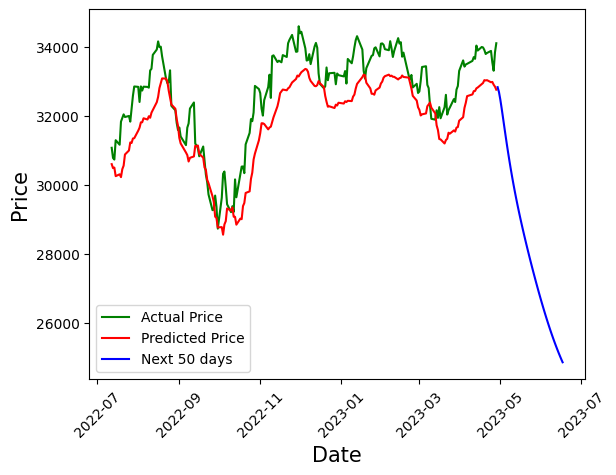

In [ ]:
# plt.plot(test_, label='Actual Price', color='green')
plt.plot(yahoo_data[-(test_seq.shape[0]):].index,test_, label='Actual Price', color='green')
plt.plot(yahoo_data[-(test_seq.shape[0]):].index,y_pred_, label='Predicted Price', color='red')
plt.plot(future_dates,next_data, label='Next 50 days', color='blue')

plt.legend()
plt.xlabel('Date', size=15)
plt.ylabel('Price', size=15)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(True)
plt.show()
# plt.show()